# 기하하적 변환

기하학적 변환(geometric transform)은 이미지의 좌표에 기하학적인 연산을 통해 새로운 좌표를 얻는 것을 뜻한다. 기하학(geometry)이라는 말은 그리스어 게오메트리아(geometria)에서 나온 말로, geo는 땅을 뜻하고 metria는 측정을 뜻하는 것으로 고대에 토지를 측량하는 데서 발전되어온 수학의 한 분야다. 이미지에 기하학적 변환을 하면 이동, 확대, 축소, 회전 등 일상생활에서 흔히 접하는 변환에서부터 볼록 거울에 비친 모습이나 일렁이는 물결에 비친 모습과 같은 여러 가지 왜곡된 모양으로도 변환할 수 있다.

## 이동

$$\begin{split}
x^{\prime}=& x + d_{x}\\
y^{\prime}=& y + d_{y}
\end{split}$$

위 방정식을 행렬식으로 표현하면 다음과 같다.

$$
\left[ \begin{array}{c} x^{\prime}\\ y^{\prime}\end{array} \right] = \left[ \begin{array}{c} 1 & 0 & d_{x} \\ 0 & 1 & d_{y} \end{array} \right] \left[ \begin{array}{c} x \\ y \\ 1 \end{array} \right]
$$



$$
\left[ \begin{array}{c} x^{\prime}\\ y^{\prime}\end{array} \right] = \left[ \begin{array}{c} x + d_{x} \\ y + d_{y} \end{array} \right] \left[ \begin{array}{c} 1x + 0y + 1d_{x} \\ 0x + 1y + 1d_{y} \end{array} \right]
$$

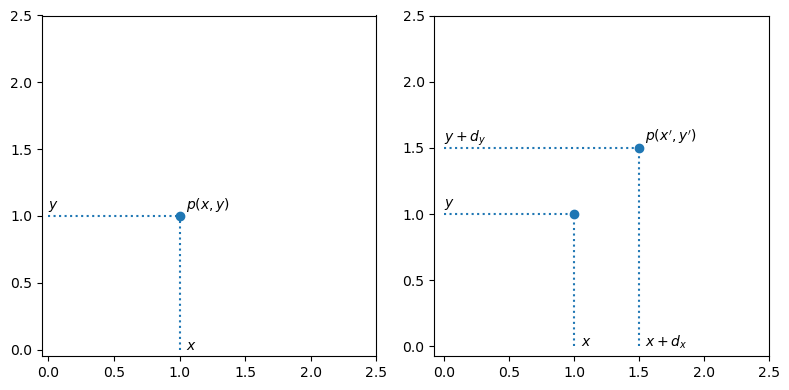

In [58]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,4))
ax1.scatter(x=1, y=1)
ax1.vlines([1], 0, [1], linestyle='dotted')
ax1.hlines([1], 0, [1], linestyle='dotted')
ax1.text(1.05, 1.05, '$p(x,y)$')
ax1.text(0, 1.05, '$y$')
ax1.text(1.05, 0, '$x$')
ax1.set_xticks(np.arange(0, 3, 0.5))
ax1.set_yticks(np.arange(0, 3, 0.5))

ax2.scatter(x=[1, 1.5], y=[1, 1.5])
ax2.vlines([1, 1.5], 0, [1, 1.5], linestyle='dotted')
ax2.hlines([1, 1.5], 0, [1, 1.5], linestyle='dotted')
ax2.text(1.55, 1.55, '$p(x^\prime,y^\prime)$')
ax2.text(0, 1.05, '$y$')
ax2.text(1.05, 0, '$x$')
ax2.text(0, 1.55, '$y+d_y$')
ax2.text(1.55, 0, '$x+d_x$')
ax2.set_xticks(np.arange(0, 3, 0.5))
ax2.set_yticks(np.arange(0, 3, 0.5))
fig.tight_layout()
plt.show()

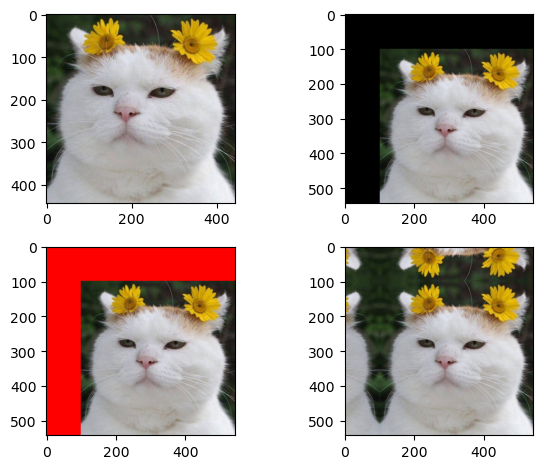

In [65]:
import cv2
import numpy as np

img = cv2.imread('./img/cat-01.jpg')
img = img[...,::-1]
rows, cols = img.shape[0:2]

dx, dy = 100, 100

mtrx = np.float32([
    [1, 0, dx],
    [0, 1, dy]
])  

dst = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy))

dst2 = cv2.warpAffine(
    img, mtrx, (cols+dx, rows+dy), None, 
    cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255,0,0)
)

dst3 = cv2.warpAffine(
    img, mtrx, (cols+dx, rows+dy), None, 
    cv2.INTER_LINEAR, cv2.BORDER_REFLECT
)

fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].imshow(img)
axes[0, 1].imshow(dst)
axes[1, 0].imshow(dst2)
axes[1, 1].imshow(dst3)
fig.tight_layout()
plt.show()

## 확대/축소
 
$$
\left[ \begin{array}{c} x^{\prime}\\ y^{\prime}\end{array} \right] = \left[ \begin{array}{c} \alpha & 0 & d_{x} \\ 0 & \beta & d_{y} \end{array} \right] \left[ \begin{array}{c} x \\ y \\ 1 \end{array} \right]
$$

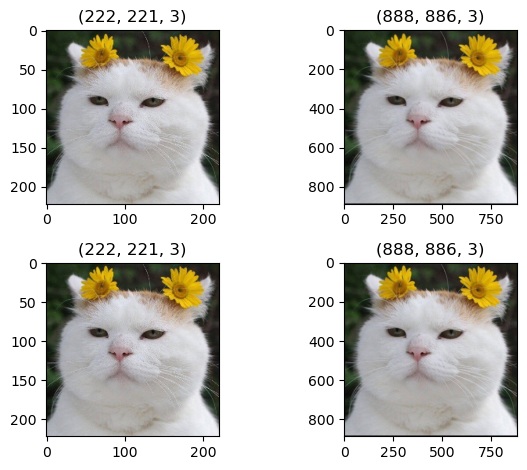

In [79]:
import cv2
import numpy as np

img = cv2.imread('./img/cat-01.jpg')
img = img[...,::-1]
height, width = img.shape[:2]

m_small = np.float32([
    [0.5, 0, 0],
    [0, 0.5, 0]
])
m_big = np.float32([
    [2, 0, 0],
    [0, 2, 0]
])  

dst1 = cv2.warpAffine(
    img, m_small, (int(height*0.5), int(width*0.5))
)
dst2 = cv2.warpAffine(
    img, m_big, (int(height*2), int(width*2))
)
dst3 = cv2.warpAffine(
    img, m_small, (int(height*0.5), int(width*0.5)),
    None, cv2.INTER_AREA
)
dst4 = cv2.warpAffine(
    img, m_big, (int(height*2), int(width*2)),
    None, cv2.INTER_CUBIC
)

fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].imshow(dst1)
axes[0, 0].set_title(dst1.shape)
axes[0, 1].imshow(dst2)
axes[0, 1].set_title(dst2.shape)
axes[1, 0].imshow(dst3)
axes[1, 0].set_title(dst3.shape)
axes[1, 1].imshow(dst4)
axes[1, 1].set_title(dst4.shape)
fig.tight_layout()
plt.show()

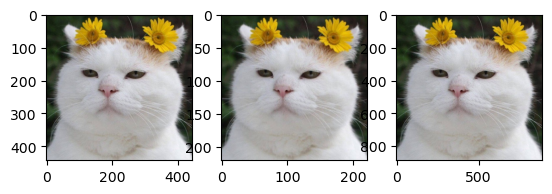

In [81]:
import cv2
import numpy as np

img = cv2.imread('./img/cat-01.jpg')
img = img[...,::-1]
height, width = img.shape[:2]

dst1 = cv2.resize(
    img, (int(width*0.5), int(height*0.5)),
    interpolation=cv2.INTER_AREA
)
dst2 = cv2.resize(img, None,  None, 2, 2, cv2.INTER_CUBIC)

fig, axes = plt.subplots(ncols=3)
axes[0].imshow(img)
axes[1].imshow(dst1)
axes[2].imshow(dst2)
plt.show()

## 회전

$$
\left[ \begin{array}{c} x^{\prime}\\ y^{\prime}\end{array} \right] = \left[ \begin{array}{c} \cos \theta & -\sin \theta & 0 \\ \sin \theta & \cos \theta & 0 \end{array} \right] \left[ \begin{array}{c} x \\ y \\ 1 \end{array} \right]
$$

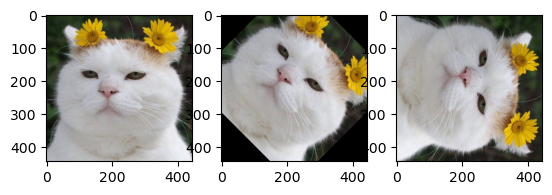

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[...,::-1]
rows,cols = img.shape[0:2]

d45 = 45.0 * np.pi / 180    # 45도
d90 = 90.0 * np.pi / 180    # 90도

m45 = np.float32([
    [np.cos(d45), -1 * np.sin(d45), rows//2],
    [np.sin(d45), np.cos(d45), -1 * cols//4]
])
m90 = np.float32([[
    np.cos(d90), -1 * np.sin(d90), rows],
    [np.sin(d90), np.cos(d90), 0]
])

r45 = cv2.warpAffine(img,m45,(cols,rows))
r90 = cv2.warpAffine(img,m90,(rows,cols))

fig, axes = plt.subplots(ncols=3)
axes[0].imshow(img)
axes[1].imshow(r45)
axes[2].imshow(r90)
plt.show()

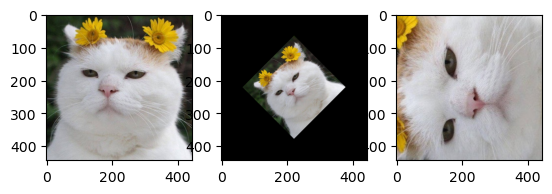

In [86]:
import cv2

img = cv2.imread('./img/cat-01.jpg')
img = img[...,::-1]
rows, cols = img.shape[0:2]

m45 = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 0.5) 
m90 = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1.5) 

img45 = cv2.warpAffine(img, m45, (cols, rows))
img90 = cv2.warpAffine(img, m90, (cols, rows))


fig, axes = plt.subplots(ncols=3)
axes[0].imshow(img)
axes[1].imshow(img45)
axes[2].imshow(img90)
plt.show()

## 뒤틀리기
### 어핀 변환
어핀 변환(affine transform)은 이동, 확대/축소, 회전을 포함하는 변환으로 직선, 길이의 비율, 평행성을 보존하는 변환이다. 어핀 변환의 특징으로 변환 전과 후의 3개의 점을 짝 지어 매핑할 수 있다면 변환행렬을 역으로 계산할 수 있다.

```python
import cv2
import numpy as np
from matplotlib import pyplot as plt

file_name = './img/cat-01.jpg'
img = cv2.imread(file_name)
rows, cols = img.shape[:2]

pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

cv2.circle(img, (100,50), 5, (255,0), -1)
cv2.circle(img, (200,50), 5, (0,255,0), -1)
cv2.circle(img, (100,200), 5, (0,0,255), -1)

mtrx = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows))

cv2.imshow('origin',img)
cv2.imshow('affin', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

### 원근 변환

원근 변환(perspective transform)은 보는 사람의 시각에 따라 같은 물체도 먼 것은 작게, 가까운 것은 크게 보이는 현상인 원근감을 표현하는 변환이다. 원금감을 느끼는 이유는 실제 세계가 3차원 좌표계이기 때문인데 영상은 2차원 좌표계이다. 그래서 차원 간의 차이를 보정해 줄 추가 연산과 시스템이 필요한데 이때 사용하는 좌표계를 동차 좌표(homogeneous coordinates)라고 한다. 이 때문에 원근 변환을 다른 말로 호모그래피(homography)라고도 한다. 2차원 좌표 $(x,y)$에 대응하는 동차 좌표는 기존 차수에 1개의 상수항을 추가해서 $(wx, wy,w)$로 표현한다. 예를 들면 동차 좌표 $(6, 15, 3)$는 2차원 좌표에서 $(\frac{6}{3},\frac{15}{3})=(2,5)$가 된다. 따라서 원근 변환을 하려면 $(x,y,1)$꼴의 좌표계가 필요하고 아래와 같이 $3 \times 3$ 변환 행렬식이 필요하다.

$$
w\left[\begin{array}{c} x^\prime \\ y^\prime \\ 1 \end{array}\right] = \
\left[\begin{array}{c}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33} \\
\end{array}\right]
\left[\begin{array}{c}
x \\ y \\ 1
\end{array}\right]
$$

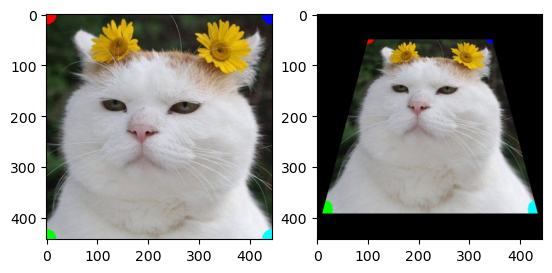

In [95]:
import cv2
import numpy as np

file_name = './img/cat-01.jpg'
img = cv2.imread(file_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols = img.shape[:2]

# 원근 변환 전 후 4개 좌표
pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
pts2 = np.float32([[100,50], [10,rows-50], [cols-100, 50], [cols-10,rows-50]])

# 변환 전 좌표를 원본 이미지에 표시
cv2.circle(img, (0,0), 20, (255,0,0), -1)
cv2.circle(img, (0,rows), 20, (0,255,0), -1)
cv2.circle(img, (cols,0), 20, (0,0,255), -1)
cv2.circle(img, (cols,rows), 20, (0,255,255), -1)

# 원근 변환 행렬 계산
mtrx = cv2.getPerspectiveTransform(pts1, pts2)
# 원근 변환 적용
dst = cv2.warpPerspective(img, mtrx, (cols, rows))

fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img)
axes[1].imshow(dst)
plt.show()

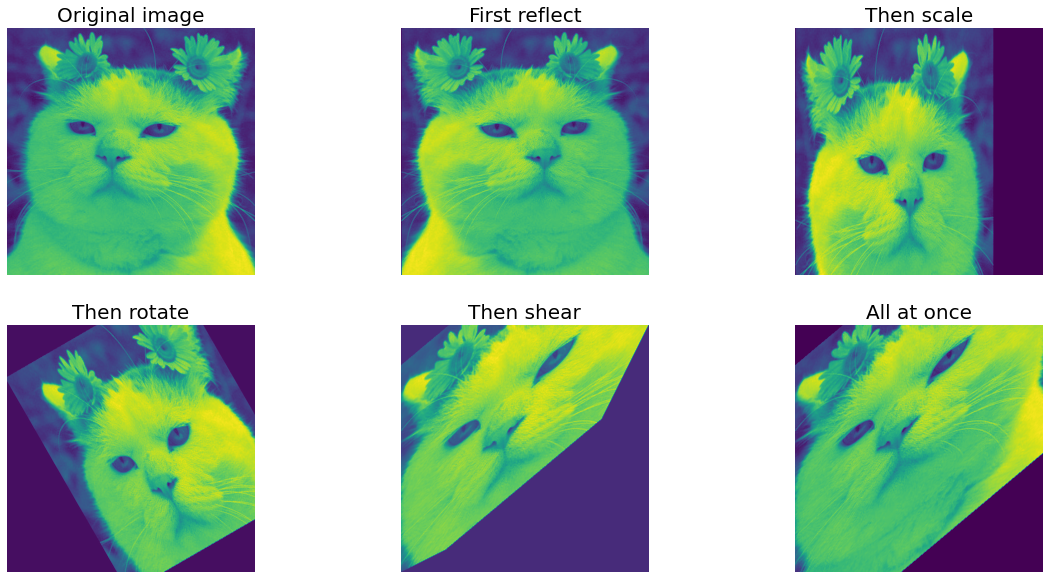

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io
from skimage import color
%matplotlib inline

img = color.rgb2gray(io.imread('./img/cat-01.jpg'))
w, h = img.shape
theta, lambda1 = np.pi/6, 0.5
mat_identity = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
mat_reflect = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
]) @ np.array([
    [1, 0, 0],
    [0, 1, -h],
    [0, 0, 1]
])
mat_scale = np.array([
    [0.75, 0, 0],
    [0, 1.25, 0],
    [0, 0, 1]
])
mat_rotate = np.array([
    [1, 0, w/2],
    [0, 1, h/2],
    [0, 0, 1]
]) @ np.array([
    [np.cos(theta), np.sin(theta), 0],
    [np.sin(theta), -np.cos(theta), 0],
    [0, 0, 1]
]) @ np.array([
    [1, 0, -w/2],
    [0, 1, -h/2],
    [0, 0, 1]
])
mat_shear = np.array([
    [1, lambda1, 0],
    [lambda1, 1, 0],
    [0, 0, 1]])
mat_all = mat_identity @ mat_reflect @ mat_scale @ mat_rotate @ mat_shear

plt.figure(figsize=(20, 10))
img1 = ndi.affine_transform(img, mat_identity)
plt.subplot(231)
plt.imshow(img1)
plt.axis('off')
plt.title('Original image', size=20)

img1 = ndimage.affine_transform(img1, mat_reflect) # offset=(0,h)
plt.subplot(232)
plt.imshow(img1)
plt.axis('off')
plt.title('First reflect', size=20)

img1 = ndimage.affine_transform(img1, mat_scale)
plt.subplot(233)
plt.imshow(img1)
plt.axis('off')
plt.title('Then scale', size=20)

img1 = ndimage.affine_transform(img1, mat_rotate)
plt.subplot(234)
plt.imshow(img1)
plt.axis('off')
plt.title('Then rotate', size=20)

img1 = ndimage.affine_transform(img1, mat_shear)
plt.subplot(235)
plt.imshow(img1)
plt.axis('off')
plt.title('Then shear', size=20) 

plt.subplot(236)
plt.imshow(ndimage.affine_transform(img, mat_all))
plt.axis('off')
plt.title('All at once', size=20) 
plt.show()

True


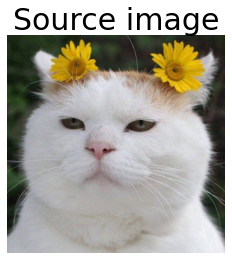

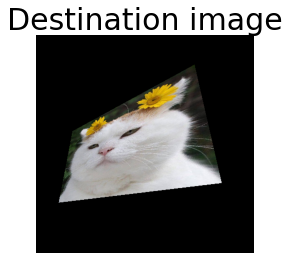

In [58]:
import numpy as np
import matplotlib.pylab as plt
from skimage import io
from skimage import color
from skimage.transform import ProjectiveTransform

im_src = (io.imread('./img/cat-01.jpg'))
height, width, dim = im_src.shape
im_dst = np.zeros((height, width, dim))

pt = ProjectiveTransform()
src = np.array([
    [0., 0.],
    [height-1, 0.],
    [height-1, width-1],
    [0., width-1]
])
dst = np.array([
    [ 195., 74.],
    [ 340., 46. ],
    [ 300., 377.],
    [  60., 322.]
])

print(pt.estimate(src, dst))

x, y = np.mgrid[:height, :width]
dst_indices=np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) 
src_indices = np.round(pt.inverse(dst_indices), 0).astype(int)
valid_idx = np.where((src_indices[:,0] < height) & (src_indices[:,1] < width) & (src_indices[:,0] >= 0) & (src_indices[:,1] >= 0))
dst_indicies_valid = dst_indices[valid_idx]
src_indicies_valid = src_indices[valid_idx]
im_dst[dst_indicies_valid[:,0],dst_indicies_valid[:,1]] = im_src[src_indicies_valid[:,0],src_indicies_valid[:,1]]
im_dst = im_dst.astype(np.uint8)

plt.imshow(im_src, cmap='gray')
plt.axis('off')
plt.title('Source image', size=30)
plt.show()

plt.imshow(im_dst, cmap='gray')
plt.axis('off')
plt.title('Destination image', size=30)
plt.show()

io.imsave('./img/trans_cat.jpg', im_dst)

True


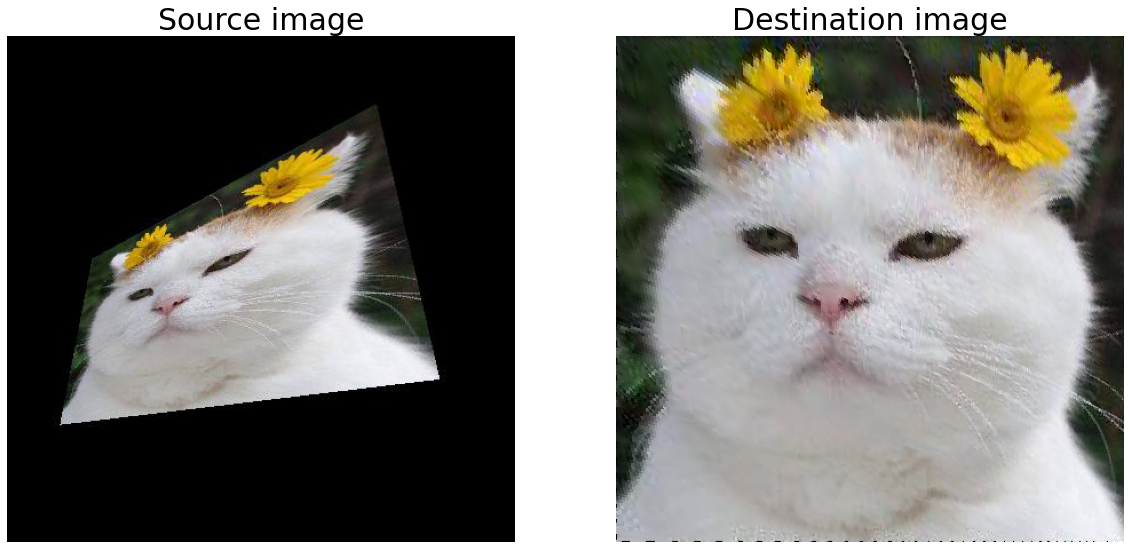

In [59]:
im_src = (io.imread('./img/trans_cat.jpg'))
height, width, dim = im_src.shape
im_dst = np.zeros((height, width, dim))

pt = ProjectiveTransform()
src = np.array([
    [ 195., 74.],
    [ 340., 46. ],
    [ 300., 377.],
    [  60., 322.]
])
dst = np.array([[   0.,    0.],
       [height-1,    0.],
       [height-1,  width-1],
       [   0.,  width-1]
])

print(pt.estimate(src, dst))
x, y = np.mgrid[:height, :width]
dst_indices = np.hstack(
    (x.reshape(-1, 1), y.reshape(-1,1))
) 
src_indices = np.round(pt.inverse(dst_indices), 0).astype(int)
valid_idx = np.where(
    (src_indices[:, 0] < height) & (src_indices[:, 1] < width) 
    & (src_indices[:, 0] >= 0) & (src_indices[:, 1] >= 0)
)
dst_indicies_valid = dst_indices[valid_idx]
src_indicies_valid = src_indices[valid_idx]
im_dst[dst_indicies_valid[:,0], dst_indicies_valid[:, 1]] = \
    im_src[src_indicies_valid[:, 0], src_indicies_valid[:, 1]]
im_dst = im_dst.astype(np.uint8)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(im_src, cmap='gray')
plt.axis('off')
plt.title('Source image', size=30)

plt.subplot(122)
plt.imshow(im_dst, cmap='gray')
plt.axis('off')
plt.title('Destination image', size=30)
plt.show()

## 렌즈 왜곡

지금까지 변환은 행렬식으로 표현했다. 하지만 행렬식으로 표현할 수 없는 모양의 변환이 있다. 빗방물이 유리창에 맺혀 렌즈 왜곡(lens distortion) 변환이다. 

원점 $O$에서 점 $p$까지의 거리와 원 안의 직각삼각형의 각 $\theta$를 이용해 $(r, \theta)$로 나타내는 방법이다. 이런 방법을 극좌표계(polar coordinate system)라고 하고 두 좌표계는 다음 식으로 상호 변환할 수 있다.

* 직교좌표 $\rightarrow$ 극좌표: $\theta = \arctan(x,y), r=\sqrt{x^2+y^2}$
* 극좌표 $\rightarrow$ 직교좌표: $x=r \cos(\theta), y=r \sin(\theta)$

직교좌표를 극좌표로 바꾸면 원 안의 픽셀만을 대상으로 손쉽게 작업할 수 있고 원점과 거리 $r$로 원의 모양이나 범위를 계산할 수 있다.

(443, 444, 3)


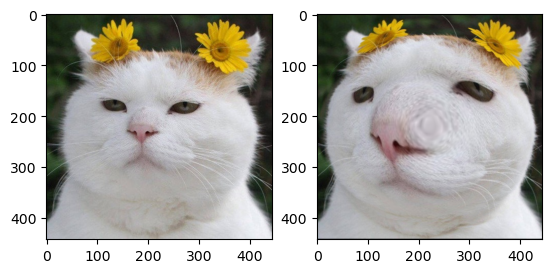

In [96]:
import cv2
import numpy as np

img = cv2.imread('./img/cat-01.jpg')
img = img[...,::-1]
print(img.shape)
rows, cols = img.shape[:2]

exp = 2  # 볼록, 오목 지수(오목 : 0.1 ~ 1, 볼록 : 1.1~)
scale = 1  # 변환 영역 크기(0 ~ 1)

mapy, mapx = np.indices((rows, cols), dtype=np.float32)

# 좌상단 기준좌표에서 -1~1로 정규화된 중심점 기준 좌표로 변경
mapx = 2*mapx/(cols-1)-1
mapy = 2*mapy/(rows-1)-1

# 직교좌표를 극 좌표로 변환
r, theta = cv2.cartToPolar(mapx, mapy)

# 왜곡 영역만 중심확대/축소 지수 적용
r[r < scale] = r[r < scale] ** exp  

# 극 좌표를 직교좌표로 변환
mapx, mapy = cv2.polarToCart(r, theta)

# 중심점 기준에서 좌상단 기준으로 변경
mapx = ((mapx + 1) * cols - 1) / 2
mapy = ((mapy + 1) * rows - 1) / 2
# 재매핑 변환
distorted = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img)
axes[1].imshow(distorted)
plt.show()

### 방사 왜곡

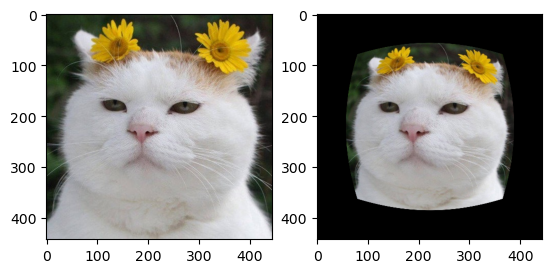

In [99]:
import cv2
import numpy as np

# 왜곡 계수 설정
k1, k2, k3 = 0.5, 0.2, 0.0  # 배럴 왜곡
#k1, k2, k3 = -0.3, 0, 0    # 핀큐션 왜곡

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]
rows, cols = img.shape[:2]

# 매핑 배열 생성
mapy, mapx = np.indices((rows, cols), dtype=np.float32)

# 중앙점 좌표로 -1~1 정규화 및 극좌표 변환
mapx = 2 * mapx / (cols - 1) - 1
mapy = 2 * mapy / (rows - 1) - 1
r, theta = cv2.cartToPolar(mapx, mapy)

# 방사 왜곡 변영 연산
ru = r * (1 + k1 * (r ** 2) + k2 * (r ** 4) + k3 * (r ** 6)) 

# 직교좌표 및 좌상단 기준으로 복원
mapx, mapy = cv2.polarToCart(ru, theta)
mapx = ((mapx + 1) * cols - 1) / 2
mapy = ((mapy + 1) * rows - 1) / 2
distored = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img)
axes[1].imshow(distored)
plt.show()

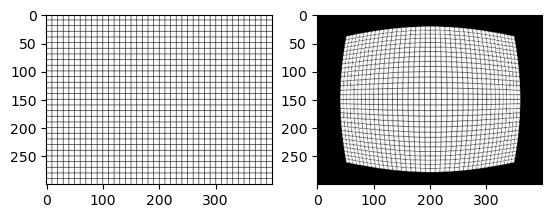

In [101]:
import cv2
import numpy as np

# 격자 무늬 영상 생성
img = np.full((300, 400, 3), 255, np.uint8)
img[::10, :, :] = 0
img[:, ::10, :] = 0
width  = img.shape[1]
height = img.shape[0]

# 왜곡 계수 설정
k1, k2, p1, p2 = 0.001, 0, 0, 0  # 배럴 왜곡
# k1, k2, p1, p2 = -0.0005, 0, 0, 0  # 핀쿠션 왜곡
distCoeff = np.float64([k1, k2, p1, p2])

# 임의의 값으로 카메라 매트릭스 설정
fx, fy = 10, 10
cx, cy = width / 2, height / 2
camMtx = np.float32([
    [fx, 0, cx],
    [0, fy, cy],
    [0, 0, 1]
])

# 왜곡 변형
dst = cv2.undistort(img, camMtx, distCoeff)

fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img)
axes[1].imshow(dst)
plt.show()

```python
import cv2

rate = 15  # 모자이크에 사용할 축소 비율 (1/rate)
win_title = 'mosaic'
img = cv2.imread('../img/taekwonv1.jpg')

while True:
    x,y,w,h = cv2.selectROI(win_title, img, False)  # 관심영역 선택
    if w and h:
        roi = img[y:y+h, x:x+w]  # 관심영역 지정
        roi = cv2.resize(roi, (w//rate, h//rate))  # 1/rate 비율로 축소
        # 원래 크기로 확대
        roi = cv2.resize(roi, (w,h), interpolation=cv2.INTER_AREA)  
        img[y:y+h, x:x+w] = roi  # 원본 이미지에 적용
        cv2.imshow(win_title, img)
    else:
        break

cv2.destroyAllWindows()
```

(443, 444, 3)


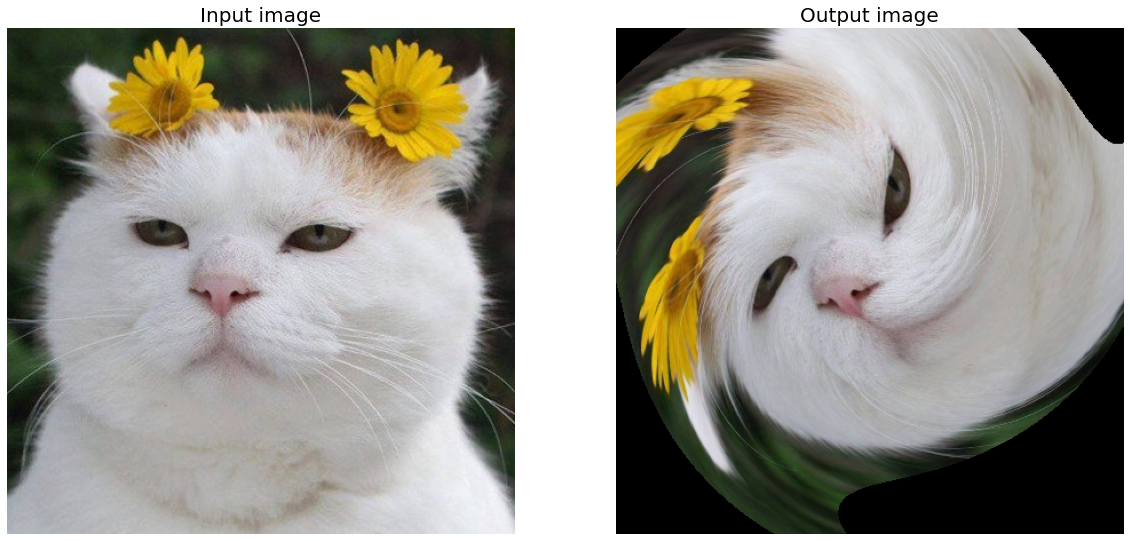

In [34]:
from skimage import io
from skimage.transform import warp
import matplotlib.pylab as plt

def swirl(xy, x0, y0, R):
    r = np.sqrt((xy[:,1]-x0)**2 + (xy[:,0]-y0)**2)
    a = np.pi*r / R
    xy[:, 1], xy[:, 0] = (xy[:, 1]-x0)*np.cos(a) + (xy[:, 0]-y0)*np.sin(a) + x0, -(xy[:, 1]-x0)*np.sin(a) + (xy[:, 0]-y0)*np.cos(a) + y0
    return xy

img = io.imread('./img/cat-01.jpg')
print(im.shape)
img1 = warp(
    img, swirl, map_args={'x0': 200, 'y0': 200, 'R': 350}
)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title('Input image', size=20)

plt.subplot(122)
plt.imshow(img1)
plt.axis('off')
plt.title('Output image', size=20)
plt.show()

## 보간

기하하적 변환에 대해 생각해야하는 것은 실수 좌표를 단순히 반올림하여 정수로 바뀌는데 목표 영상의 여러 점이 원래 영상의 같은 점을 참조할 수 있으므로 에일리어싱이 남는다. 이 문제를 해결하는 데 효과적인 안티 에일리어싱 기법은 보간(interpolation)이다. 목표 영상의 한 점을 기하 변환했을 때 입력 영상의 어디에 떨어지는지를 보여준다. 이때 입력 영상의 어떤 점으로부터 값을 취할지 중요하다.

<div>
    <img src="https://t1.daumcdn.net/cfile/tistory/251B684254A21D5013" style="height: 300px" />
</div>

<div>
    <img src="https://www.mathworks.com/help/images/geom7.gif" style="height: 300px" />
</div>

<div>
    <img src="https://1.bp.blogspot.com/-Fkf3JtsLFJ4/WgLV4PrG8PI/AAAAAAAABz8/yEglVQ3S2qQRzx-q5AKjGDmVkzFLZqEBACLcBGAs/s1600/Nearest1.png" style="height: 300px" />
</div>

<div>
    <img src="https://jkd.modelejanemba.pw/img/758f88ebf51ec13bfc5a42c0b34cd4ff.png" style="height: 300px" />
</div>

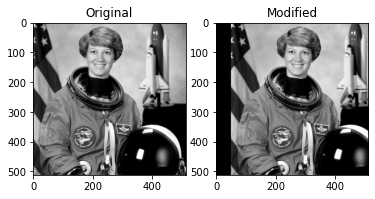

In [8]:
import matplotlib.pyplot as plt
from skimage import data, color
from scipy import ndimage

astronaut = color.rgb2gray(data.astronaut())
shifted = ndimage.shift(astronaut, (0, 50))
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(astronaut, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(shifted, cmap='gray')
axes[1].set_title('Modified')
plt.show()

```python
import cv2
import numpy as np

win_name = 'scanning'
img = cv2.imread('./img/paper.jpg')
rows, cols = img.shape[:2]
draw = img.copy()
pts_cnt = 0
pts = np.zeros((4,2), dtype=np.float32)

def onMouse(event, x, y, flags, param):
    global pts_cnt
    if event == cv2.EVENT_LBUTTONDOWN:  
        cv2.circle(draw, (x,y), 10, (0,255,0), -1)
        cv2.imshow(win_name, draw)

        pts[pts_cnt] = [x, y]
        pts_cnt+=1
        if pts_cnt == 4:
            # 좌표 4개 중 상하좌우 찾기
            sm = pts.sum(axis=1)
            diff = np.diff(pts, axis=1)

            topLeft = pts[np.argmin(sm)]
            bottomRight = pts[np.argmax(sm)]
            topRight = pts[np.argmin(diff)]
            bottomLeft = pts[np.argmax(diff)]

            # 변환 전 4개 좌표 
            pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])

            # 변환 후 영상에 사용할 서류의 폭과 높이 계산
            w1 = abs(bottomRight[0] - bottomLeft[0])
            w2 = abs(topRight[0] - topLeft[0])
            h1 = abs(topRight[1] - bottomRight[1])
            h2 = abs(topLeft[1] - bottomLeft[1])
            width = max([w1, w2])
            height = max([h1, h2])
            
            # 변환 후 4개 좌표
            pts2 = np.float32([
                [0,0], [width-1,0], 
                [width-1,height-1], [0,height-1]
            ])
            # 변환 행렬 계산 
            mtrx = cv2.getPerspectiveTransform(pts1, pts2)
            # 원근 변환 적용
            result = cv2.warpPerspective(img, mtrx, (width, height))
            cv2.imshow('scanned', result)

cv2.imshow(win_name, img)
cv2.setMouseCallback(win_name, onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()
```